# Чтение данных

Рекомендации по размеру продукта и прогнозирование соответствия имеют решающее значение для улучшения покупательского опыта клиентов и снижения показателей возврата продукта

In [2]:
import numpy as np              # Массивы (матрицы, векторы, линейная алгебра)
import matplotlib.pyplot as plt # Научная графика
%matplotlib inline 
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения

In [3]:
data = pd.read_json('renttherunway_final_data.json', lines=True)

In [4]:
type(data)

pandas.core.frame.DataFrame

In [5]:
print('Data RentTheRunWay shape: ', data.shape)

Data RentTheRunWay shape:  (192544, 15)


In [6]:
data

,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015"
3,fit,909926,34c,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014"
4,fit,151944,34b,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192539,fit,66386,34dd,2252812,140lbs,10.0,work,Fit like a glove!,hourglass,LOVE IT!!! First Item Im thinking of buying!,jumpsuit,"5' 9""",8,42.0,"May 18, 2016"
192540,fit,118398,32c,682043,100lbs,10.0,work,The pattern contrast on this dress is really s...,petite,LOVE it!,dress,"5' 1""",4,29.0,"September 30, 2016"
192541,fit,47002,36a,683251,135lbs,6.0,everyday,"Like the other DVF wraps, the fit on this is f...",straight & narrow,"Loud patterning, flattering fit",dress,"5' 8""",8,31.0,"March 4, 2016"
192542,fit,961120,36c,126335,165lbs,10.0,wedding,This dress was PERFECTION. it looked incredib...,pear,loved this dress it was comfortable and photog...,dress,"5' 6""",16,31.0,"November 25, 2015"


- user_id - a unique id fot the customer 
- age - age of the customer 
- body type - body type of customer 
- weight - weight measurement of customer 
- bust size - bust measurement of customer 
- height - height of the customer 
- item_id - unique product 
- id size - the standartized size of the product 
- category - the category of product 
- rating - rating for the product 
- rented for - purpose clothing was rented for 
- review_date - date when the review was written 
- review_summary - summary of the review 
- review_text - review given by the customer 
- fit - fit feedback

In [7]:
print(data.shape)
print(data.columns)

(192544, 15)
Index(['fit', 'user_id', 'bust size', 'item_id', 'weight', 'rating',
       'rented for', 'review_text', 'body type', 'review_summary', 'category',
       'height', 'size', 'age', 'review_date'],
      dtype='object')


##  Обработка данных

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   fit             192544 non-null  object 
 1   user_id         192544 non-null  int64  
 2   bust size       174133 non-null  object 
 3   item_id         192544 non-null  int64  
 4   weight          162562 non-null  object 
 5   rating          192462 non-null  float64
 6   rented for      192534 non-null  object 
 7   review_text     192544 non-null  object 
 8   body type       177907 non-null  object 
 9   review_summary  192544 non-null  object 
 10  category        192544 non-null  object 
 11  height          191867 non-null  object 
 12  size            192544 non-null  int64  
 13  age             191584 non-null  float64
 14  review_date     192544 non-null  object 
dtypes: float64(2), int64(3), object(10)
memory usage: 22.0+ MB


Переведем столбцы weight и height в привычную систему мер и весов

In [9]:
def lbs_to_kgs(x):
    if type(x) == type(1.0):
        return
    try:
        return (int(x[:-3]) * 0.454)
    except:
        return x
    
data.weight = data.weight.apply(lbs_to_kgs)

In [10]:
def fts_to_cms(x):
    if type(x) == type(1.0):
        return
    try:
        return (int(x[0]) * 30.48 + int(x[3:-1]) * 2.54)
    except:
        return (int(x[0]) * 30.48)
    
data.height = data.height.apply(fts_to_cms)

In [11]:
data.head()

,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,fit,420272,34d,2260466,62.198,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,172.72,14,28.0,"April 20, 2016"
1,fit,273551,34b,153475,59.928,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,167.64,12,36.0,"June 18, 2013"
2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,162.56,4,116.0,"December 14, 2015"
3,fit,909926,34c,126335,61.290,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,165.10,8,34.0,"February 12, 2014"
4,fit,151944,34b,616682,65.830,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,175.26,12,27.0,"September 26, 2016"


In [12]:
data.describe()

,user_id,item_id,weight,rating,height,size,age
count,192544.000000,1.925440e+05,162562.000000,192462.000000,191867.000000,192544.000000,191584.000000
mean,499494.100149,1.045684e+06,62.375836,9.092371,165.888978,12.245175,33.871017
std,289059.719328,8.053148e+05,9.942585,1.430044,6.765239,8.494877,8.058083
min,9.000000,1.233730e+05,22.700000,2.000000,137.160000,0.000000,0.000000
25%,250654.250000,1.950760e+05,55.842000,8.000000,160.020000,8.000000,29.000000
50%,499419.000000,9.483960e+05,61.290000,10.000000,165.100000,12.000000,32.000000
75%,750974.000000,1.678888e+06,67.192000,10.000000,170.180000,16.000000,37.000000
max,999997.000000,2.966087e+06,136.200000,10.000000,198.120000,58.000000,117.000000


In [13]:
data.describe(include = [object])

,fit,bust size,rented for,review_text,body type,review_summary,category,review_date
count,192544,174133,192534,192544,177907,192544,192544,192544
unique,3,106,9,191031,7,154740,68,2274
top,fit,34b,wedding,.,hourglass,Stylist Review,dress,"June 15, 2016"
freq,142058,27285,57784,63,55349,977,92884,844


Столбец bust size содержит много уникальных значений

In [14]:
data['bust size'].unique()

array(['34d', '34b', nan, '34c', '32b', '34d+', '36d', '36a', '32d+',
       '36c', '32c', '32dd', '30dd', '32d', '36b', '34a', '34dd',
       '40ddd/e', '32a', '38d+', '38c', '34ddd/e', '38a', '38b', '38d',
       '36ddd/e', '38dd', '38f', '42dd', '36dd', '40g', '40dd', '28f',
       '30ddd/e', '32ddd/e', '28b', '36d+', '40d', '28dd', '34f', '42c',
       '30d', '30b', '42d', '34aa', '32aa', '36f', '28c', '40b', '36aa',
       '34g', '32f', '42ddd/e', '40c', '28g', '28aa', '36g', '30a',
       '44ddd/e', '30c', '30aa', '44dd', '32i', '32g', '30g', '38h',
       '30h', '34j', '38ddd/e', '32h', '28a', '44d', '40h', '38g', '34h',
       '36j', '40f', '36h', '28ddd/e', '44f', '34i', '30f', '36i', '30i',
       '28h', '42b', '42j', '32j', '46c', '48d', '38aa', '38i', '48dd',
       '28d', '28i', '46ddd/e', '42g', '44c', '42f', '40j', '38j', '46f',
       '44b', '44g', '42h', '40i', '44h'], dtype=object)

Данные можно разделить на два столбца: bra_size (число) и cup_size (буквы)

In [15]:
data['bra_size'] = pd.to_numeric(data['bust size'].str[:2])
data['cup_size'] = data['bust size'].str[2:]
data = data.drop('bust size', axis=1)

In [16]:
data.head()

,fit,user_id,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date,bra_size,cup_size
0,fit,420272,2260466,62.198,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,172.72,14,28.0,"April 20, 2016",34.0,d
1,fit,273551,153475,59.928,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,167.64,12,36.0,"June 18, 2013",34.0,b
2,fit,360448,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,162.56,4,116.0,"December 14, 2015",NaN,NaN
3,fit,909926,126335,61.290,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,165.10,8,34.0,"February 12, 2014",34.0,c
4,fit,151944,616682,65.830,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,175.26,12,27.0,"September 26, 2016",34.0,b


In [17]:
data.describe(include = [object])

,fit,rented for,review_text,body type,review_summary,category,review_date,cup_size
count,192544,192534,192544,177907,192544,192544,192544,174133
unique,3,9,191031,7,154740,68,2274,13
top,fit,wedding,.,hourglass,Stylist Review,dress,"June 15, 2016",c
freq,142058,57784,63,55349,977,92884,844,49634


In [18]:
data['category'].unique()

array(['romper', 'gown', 'sheath', 'dress', 'leggings', 'top', 'jumpsuit',
       'sweater', 'jacket', 'shirtdress', 'maxi', 'shift', 'pants',
       'shirt', 'mini', 'skirt', 'pullover', 'blouse', 'suit', 'coat',
       'trench', 'bomber', 'cape', 'blazer', 'vest', 'duster', 'ballgown',
       'tank', 'poncho', 'frock', 'tunic', 'cardigan', 'culottes', 'down',
       'trouser', 'midi', 'pant', 'legging', 'print', 'knit', 'culotte',
       'sweatshirt', 'peacoat', 'kaftan', 'overalls', 'jogger', 'tee',
       'combo', 'henley', 'cami', 'blouson', 'turtleneck', 'trousers',
       'overcoat', 'hoodie', 't-shirt', 'caftan', 'tight', 'kimono',
       'for', 'crewneck', 'skirts', 'parka', 'buttondown', 'skort',
       'sweatershirt', 'sweatpants', 'jeans'], dtype=object)

Столбец category тоже содержит много уникальных значений, но единственное, что можно сделать - удалить его

In [19]:
data.corr()

,user_id,item_id,weight,rating,height,size,age,bra_size
user_id,1.000000,-0.002721,0.000473,-0.006973,-0.009237,0.003442,0.007424,0.005144
item_id,-0.002721,1.000000,-0.035320,-0.001163,0.004690,-0.044311,0.026516,-0.051760
weight,0.000473,-0.035320,1.000000,-0.022494,0.383784,0.850962,0.066194,0.642023
rating,-0.006973,-0.001163,-0.022494,1.000000,0.001746,-0.036731,-0.035280,-0.019586
height,-0.009237,0.004690,0.383784,0.001746,1.000000,0.228875,-0.007465,0.156607
size,0.003442,-0.044311,0.850962,-0.036731,0.228875,1.000000,0.155687,0.660161
age,0.007424,0.026516,0.066194,-0.035280,-0.007465,0.155687,1.000000,0.171436
bra_size,0.005144,-0.051760,0.642023,-0.019586,0.156607,0.660161,0.171436,1.000000


Матрица корреляции

In [20]:
data.corr() > 0.5

,user_id,item_id,weight,rating,height,size,age,bra_size
user_id,True,False,False,False,False,False,False,False
item_id,False,True,False,False,False,False,False,False
weight,False,False,True,False,False,True,False,True
rating,False,False,False,True,False,False,False,False
height,False,False,False,False,True,False,False,False
size,False,False,True,False,False,True,False,True
age,False,False,False,False,False,False,True,False
bra_size,False,False,True,False,False,True,False,True


Достаточно большие значения коэффициента корреляции между признаками weight, size, bra size достаточно объяснимы. 

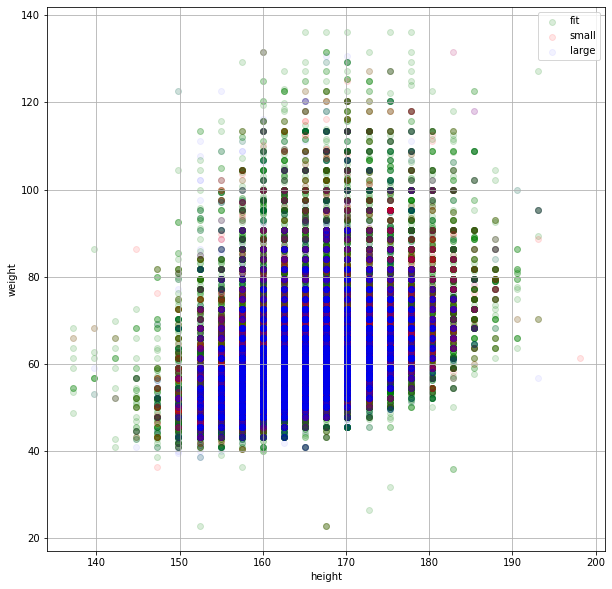

In [21]:
plt.figure(figsize = (10, 10))

plt.scatter(data[data['fit'] == 'fit']['height'],
            data[data['fit'] == 'fit']['weight'],
            alpha = 0.15,
            label = 'fit',
            color = 'g')

plt.scatter(data[data['fit'] == 'small']['height'],
            data[data['fit'] == 'small']['weight'],
            alpha = 0.1,
            label = 'small',
            color = 'r')

plt.scatter(data[data['fit'] == 'large']['height'],
            data[data['fit'] == 'large']['weight'],
            alpha = 0.05,
            label = 'large',
            color = 'b')

plt.xlabel('height')
plt.ylabel('weight')
plt.legend()
plt.grid()

Построим все возможные диаграммы рассеивания для каждой пары переменных

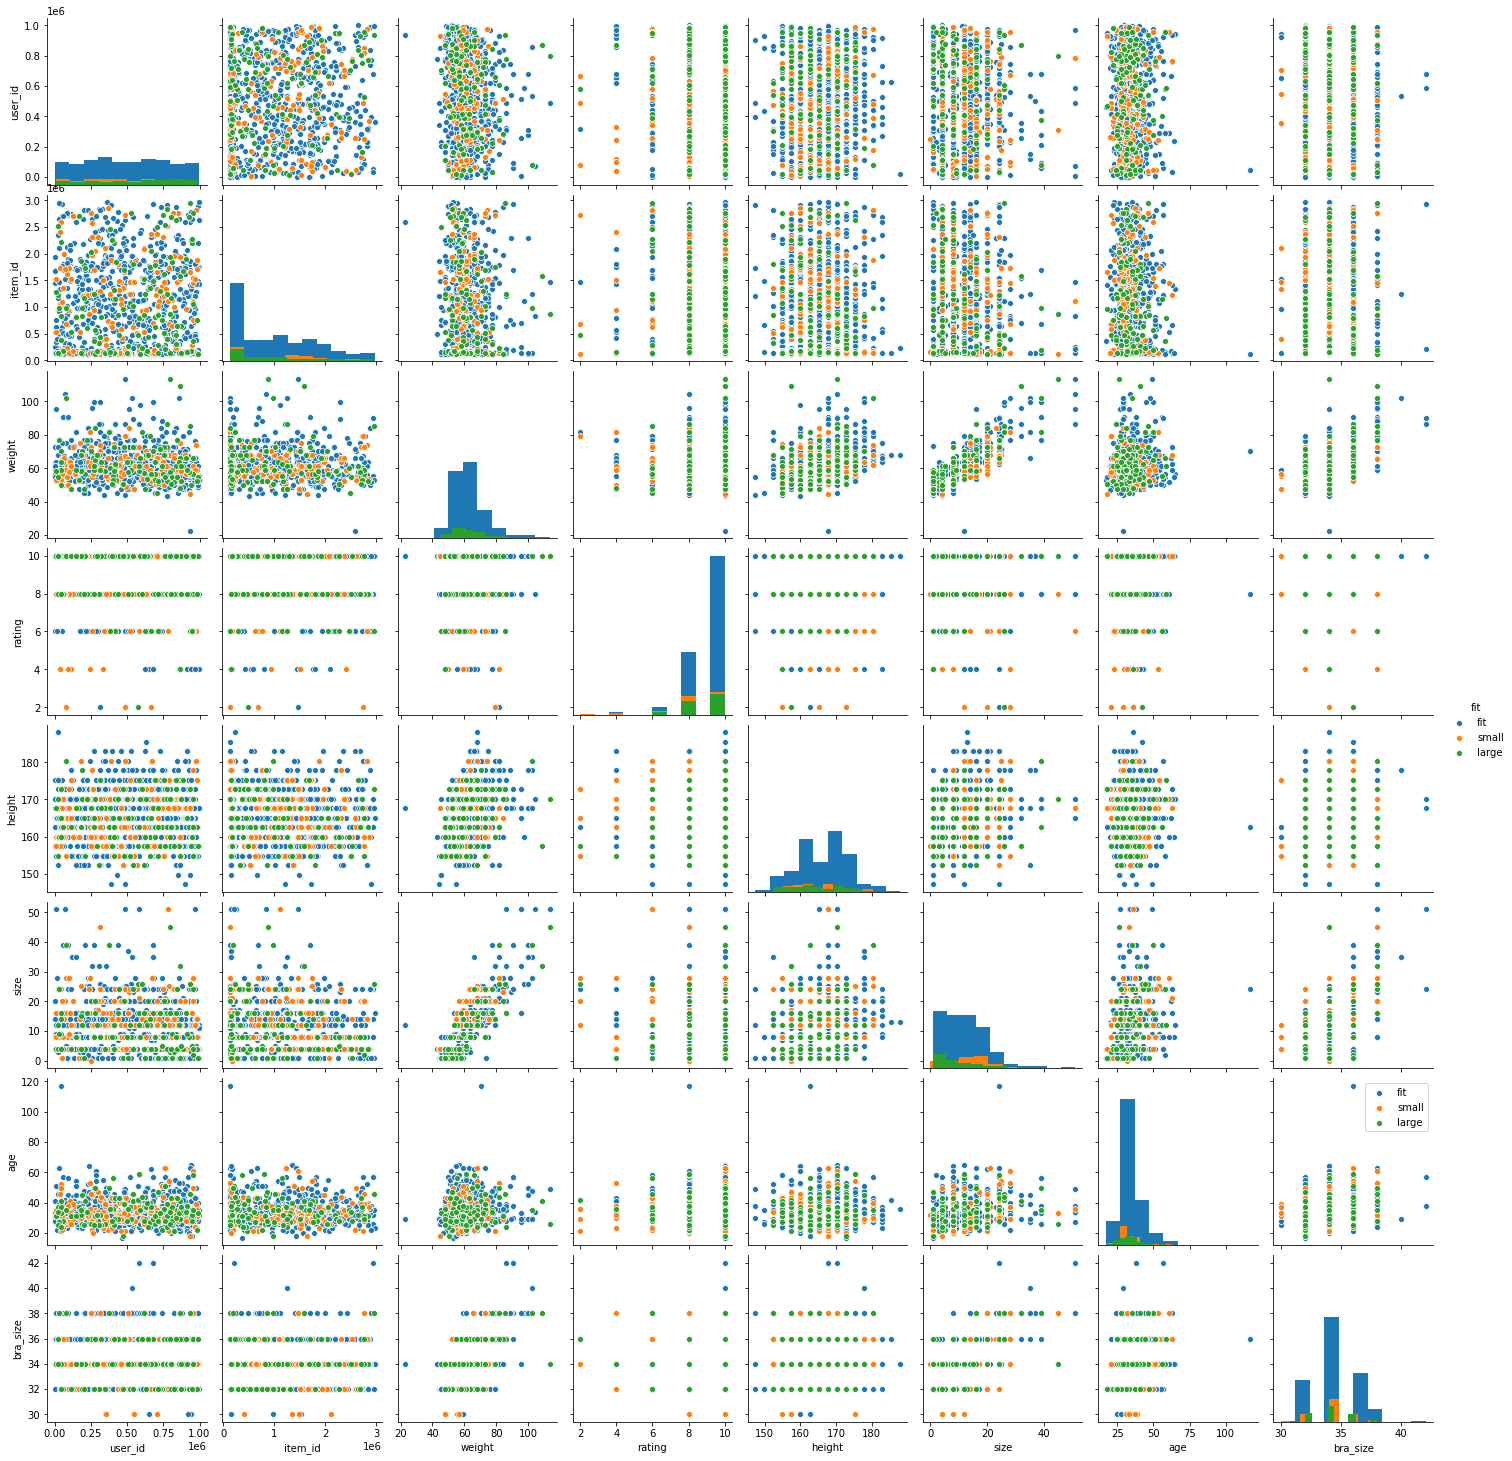

In [22]:
np.random.seed(42)
random_subset = np.random.choice(np.arange(data.shape[0]), size=1000, replace=False)
sns.pairplot(data.iloc[random_subset], hue='fit', diag_kind='hist')
plt.legend()
pass

На диаграммах, в частности, наблюдается попарная корреляция между size, weigh и bra size.

На диагонали расположены гистограммы распределения признаков.

# Обработка пропущенных значений

In [23]:
missing = pd.DataFrame({'missing': data.isnull().sum(), '%': round((data.isnull().sum()/192544)*100, 2)})
missing

,missing,%
fit,0,0.00
user_id,0,0.00
item_id,0,0.00
weight,29982,15.57
rating,82,0.04
rented for,10,0.01
review_text,0,0.00
body type,14637,7.60
review_summary,0,0.00
category,0,0.00


In [24]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['fit', 'rented for', 'review_text', 'body type', 'review_summary', 'category', 'review_date', 'cup_size']
['user_id', 'item_id', 'weight', 'rating', 'height', 'size', 'age', 'bra_size']


In [25]:
data.median(axis = 0)

user_id     499419.00
item_id     948396.00
weight          61.29
rating          10.00
height         165.10
size            12.00
age             32.00
bra_size        34.00
dtype: float64

In [26]:
data = data.fillna(data.median(axis = 0), axis = 0)

In [27]:
data_describe = data.describe(include = [object])
data_describe

,fit,rented for,review_text,body type,review_summary,category,review_date,cup_size
count,192544,192534,192544,177907,192544,192544,192544,174133
unique,3,9,191031,7,154740,68,2274,13
top,fit,wedding,.,hourglass,Stylist Review,dress,"June 15, 2016",c
freq,142058,57784,63,55349,977,92884,844,49634


In [28]:
for c in categorical_columns:
    data[c] = data[c].fillna(data_describe[c]['top'])

In [29]:
missing = pd.DataFrame({'missing': data.isnull().sum(), '%': round((data.isnull().sum()/192544)*100, 2)})
missing

,missing,%
fit,0,0.0
user_id,0,0.0
item_id,0,0.0
weight,0,0.0
rating,0,0.0
rented for,0,0.0
review_text,0,0.0
body type,0,0.0
review_summary,0,0.0
category,0,0.0


# Анализ задачи

Столбцы user_id и item_id не являются значимыми для подбора подходящей одежды.

In [30]:
data = data.drop(['user_id', 'item_id', 'review_date', 'review_summary', 'review_text'], axis=1)

In [31]:
data.head()

,fit,weight,rating,rented for,body type,category,height,size,age,bra_size,cup_size
0,fit,62.198,10.0,vacation,hourglass,romper,172.72,14,28.0,34.0,d
1,fit,59.928,10.0,other,straight & narrow,gown,167.64,12,36.0,34.0,b
2,fit,61.290,10.0,party,hourglass,sheath,162.56,4,116.0,34.0,c
3,fit,61.290,8.0,formal affair,pear,dress,165.10,8,34.0,34.0,c
4,fit,65.830,10.0,wedding,athletic,gown,175.26,12,27.0,34.0,b


# Векторизация данных

In [32]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
categorical_columns.remove('fit')
print(categorical_columns)

['rented for', 'body type', 'category', 'cup_size']


In [33]:
data_categorical = pd.get_dummies(data[categorical_columns])
print(data_categorical.columns)

Index(['rented for_date', 'rented for_everyday', 'rented for_formal affair',
       'rented for_other', 'rented for_party', 'rented for_party: cocktail',
       'rented for_vacation', 'rented for_wedding', 'rented for_work',
       'body type_apple', 'body type_athletic', 'body type_full bust',
       'body type_hourglass', 'body type_pear', 'body type_petite',
       'body type_straight & narrow', 'category_ballgown', 'category_blazer',
       'category_blouse', 'category_blouson', 'category_bomber',
       'category_buttondown', 'category_caftan', 'category_cami',
       'category_cape', 'category_cardigan', 'category_coat', 'category_combo',
       'category_crewneck', 'category_culotte', 'category_culottes',
       'category_down', 'category_dress', 'category_duster', 'category_for',
       'category_frock', 'category_gown', 'category_henley', 'category_hoodie',
       'category_jacket', 'category_jeans', 'category_jogger',
       'category_jumpsuit', 'category_kaftan', 'category_k

# Нормализация данных

In [34]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,weight,rating,height,size,age,bra_size
count,192544.000000,192544.000000,192544.000000,192544.000000,192544.000000,192544.000000
mean,62.206755,9.092758,165.886204,12.245175,33.861689,34.182026
std,9.144217,1.429862,6.753497,8.494877,8.039050,1.660765
min,22.700000,2.000000,137.160000,0.000000,0.000000,28.000000
25%,56.750000,8.000000,160.020000,8.000000,29.000000,34.000000
50%,61.290000,10.000000,165.100000,12.000000,32.000000,34.000000
75%,65.830000,10.000000,170.180000,16.000000,37.000000,36.000000
max,136.200000,10.000000,198.120000,58.000000,117.000000,48.000000


In [35]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)
data_numerical.describe()

,weight,rating,height,size,age,bra_size
count,1.925440e+05,1.925440e+05,1.925440e+05,1.925440e+05,1.925440e+05,1.925440e+05
mean,6.519460e-12,1.788176e-15,-5.159876e-12,-2.038348e-16,-5.217660e-16,7.557040e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-4.320409e+00,-4.960448e+00,-4.253530e+00,-1.441478e+00,-4.212151e+00,-3.722398e+00
25%,-5.967438e-01,-7.642401e-01,-8.686173e-01,-4.997336e-01,-6.047591e-01,-1.096037e-01
50%,-1.002552e-01,6.344961e-01,-1.164144e-01,-2.886153e-02,-2.315807e-01,-1.096037e-01
75%,3.962335e-01,6.344961e-01,6.357885e-01,4.420105e-01,3.903834e-01,1.094661e+00
max,8.091807e+00,6.344961e-01,4.772905e+00,5.386167e+00,1.034181e+01,8.320249e+00


# Соединяем данные в одну таблицу

In [36]:
data = pd.concat((data_numerical, data_categorical, data['fit']), axis = 1)
print(data.shape)

(192544, 104)


In [37]:
data.describe()

,weight,rating,height,size,age,bra_size,rented for_date,rented for_everyday,rented for_formal affair,rented for_other,...,cup_size_c,cup_size_d,cup_size_d+,cup_size_dd,cup_size_ddd/e,cup_size_f,cup_size_g,cup_size_h,cup_size_i,cup_size_j
count,1.925440e+05,1.925440e+05,1.925440e+05,1.925440e+05,1.925440e+05,1.925440e+05,192544.000000,192544.000000,192544.000000,192544.000000,...,192544.000000,192544.000000,192544.000000,192544.000000,192544.000000,192544.000000,192544.000000,192544.000000,192544.000000,192544.000000
mean,6.519460e-12,1.788176e-15,-5.159876e-12,-2.038348e-16,-5.217660e-16,7.557040e-16,0.038370,0.087367,0.209864,0.079919,...,0.353400,0.233754,0.020546,0.034813,0.013514,0.002379,0.002285,0.000810,0.000208,0.000156
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.192089,0.282373,0.407212,0.271169,...,0.478027,0.423219,0.141859,0.183306,0.115461,0.048714,0.047749,0.028453,0.014412,0.012481
min,-4.320409e+00,-4.960448e+00,-4.253530e+00,-1.441478e+00,-4.212151e+00,-3.722398e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-5.967438e-01,-7.642401e-01,-8.686173e-01,-4.997336e-01,-6.047591e-01,-1.096037e-01,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-1.002552e-01,6.344961e-01,-1.164144e-01,-2.886153e-02,-2.315807e-01,-1.096037e-01,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.962335e-01,6.344961e-01,6.357885e-01,4.420105e-01,3.903834e-01,1.094661e+00,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.091807e+00,6.344961e-01,4.772905e+00,5.386167e+00,1.034181e+01,8.320249e+00,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# X и Y

In [38]:
X = data.drop(('fit'), axis = 1)
y = data['fit']

In [39]:
print(X.shape)
print(y.shape)

(192544, 103)
(192544,)


In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print(X_train.shape[0], X_test.shape[0])

134780 57764


# kNN

In [41]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [42]:
y_train_predict = knn.predict(X_train)

In [43]:
y_test_predict = knn.predict(X_test)

In [44]:
err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.2476109215017065 0.26947579807492555


Найдем оптимальное значение n_neighbors

In [45]:
%%time
from sklearn.model_selection import GridSearchCV
nnb = [1, 10, 25, 50, 100]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)


0.258784686155216 50
Wall time: 1h 29min 1s


Наилучшее значение количества ближайших соседей = 50

In [46]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.25703368452292624 0.2629319299217506
